In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/batch_corrected/Hao_PBMC_Harmony_unscaled.h5ad')
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
labels = adata.obs['celltype.l1']
types = np.unique(labels).tolist()
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

## Read PreLect features

In [3]:
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch/Level1/feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

Feature_count  Positive_feature_count
B                   11                       6
CD4_T              346                     197
CD8_T               22                       7
DC                  32                      15
Mono                19                      10
NK                  33                      17
other                4                       2
other_T             59                      25

In [4]:
features_dict['B']

Gene    Weight  Tendency
0    S100A4 -0.115286         0
1      IGKC  0.267143         1
2      CD74  0.134287         1
3   HLA-DRA  0.139131         1
4      ACTB -0.115352         0
5    TMSB4X -0.437352         0
6     MS4A1  1.270126         1
7    MALAT1 -0.184767         0
8      IGHM  0.069343         1
9       B2M -0.279397         0
10    CD79A  1.484380         1

In [11]:
# write to query for ACT
text = ''
for celltype in types:
    features = features_dict[celltype]['Gene'].tolist()
    features = ', '.join(features)
    # print(features)
    text_celltype = f'{celltype}: {features}\n'
    text += text_celltype

In [13]:
print(text)

B: S100A4, IGKC, CD74, HLA-DRA, ACTB, TMSB4X, MS4A1, MALAT1, IGHM, B2M, CD79A
CD4_T: RPL22, PARK7, CDC42, RPL11, SH3BGRL3, CD52, NDUFS5, SMAP2, YBX1, RPS8, UQCRH, JUN, SERBP1, RPL5, CD2, TXNIP, CTSS, S100A11, S100A6, S100A4, RPS27, PBXIP1, TAGLN2, CD247, PRRC2C, PRDX6, PTPRC, CD55, H3F3A, GUK1, HNRNPU, RPS7, ID2, EML4, CALM2, RPS27A, ACTR2, AAK1, TMSB10, MAL, DUSP2, MGAT4A, RPL31, GCC2, LIMS1, GYPC, MZT2B, MZT2A, ATP5MC3, STK17B, BZW1, ARPC2, PTMA, ARL4C, RPL32, RPL15, RPSA, RPL14, TMA7, RPL29, FHIT, ARL6IP5, FOXP1, RPL24, TRAT1, CD96, H1FX, SERP1, MBNL1, EIF4A2, RPL35A, BOD1L1, KLF3, RPL9, HNRNPDL, RPL34, SNHG8, INPP4B, RPS3A, HMGB2, SUB1, IL7R, FYB1, RPL37, IL6ST, KIF2A, PIK3R1, NSA2, TBCA, RPS23, COX7C, TNFAIP8, HINT1, PAIP2, CD74, RPS14, DUSP1, RIPOR2, BTN3A2, HLA-F, HLA-A, HLA-C, HLA-B, LTB, AIF1, CLIC1, HLA-DRA, HLA-DPB1, RPS18, RPL10A, SRSF3, CCND3, HSP90AB1, EEF1A1, PNRC1, PNISR, RPS12, TNFAIP3, RNASET2, ACTB, TOMM7, SEPT7, STK17A, IKZF1, GTF2I, AKAP9, ARPC1B, LAMTOR4, TRBC1, T

In [29]:
# CD4 T top 30 features
features = features_dict['CD4_T']['Gene'].tolist()#[:30]
print(len(features))
features = ', '.join(features)
text = f'CD4_T: {features}\n'
print(text)

346
CD4_T: RPL22, PARK7, CDC42, RPL11, SH3BGRL3, CD52, NDUFS5, SMAP2, YBX1, RPS8, UQCRH, JUN, SERBP1, RPL5, CD2, TXNIP, CTSS, S100A11, S100A6, S100A4, RPS27, PBXIP1, TAGLN2, CD247, PRRC2C, PRDX6, PTPRC, CD55, H3F3A, GUK1, HNRNPU, RPS7, ID2, EML4, CALM2, RPS27A, ACTR2, AAK1, TMSB10, MAL, DUSP2, MGAT4A, RPL31, GCC2, LIMS1, GYPC, MZT2B, MZT2A, ATP5MC3, STK17B, BZW1, ARPC2, PTMA, ARL4C, RPL32, RPL15, RPSA, RPL14, TMA7, RPL29, FHIT, ARL6IP5, FOXP1, RPL24, TRAT1, CD96, H1FX, SERP1, MBNL1, EIF4A2, RPL35A, BOD1L1, KLF3, RPL9, HNRNPDL, RPL34, SNHG8, INPP4B, RPS3A, HMGB2, SUB1, IL7R, FYB1, RPL37, IL6ST, KIF2A, PIK3R1, NSA2, TBCA, RPS23, COX7C, TNFAIP8, HINT1, PAIP2, CD74, RPS14, DUSP1, RIPOR2, BTN3A2, HLA-F, HLA-A, HLA-C, HLA-B, LTB, AIF1, CLIC1, HLA-DRA, HLA-DPB1, RPS18, RPL10A, SRSF3, CCND3, HSP90AB1, EEF1A1, PNRC1, PNISR, RPS12, TNFAIP3, RNASET2, ACTB, TOMM7, SEPT7, STK17A, IKZF1, GTF2I, AKAP9, ARPC1B, LAMTOR4, TRBC1, TRBC2, GSTK1, GIMAP7, TMSB4X, DDX3X, UXT, RPS4X, ITM2A, TSC22D3, RPL39, CD4

In [10]:
T_marker = 'CD3D, CD3E, CD3G, IL7R, CD8A, IL2RA, CCR7, CD2, CD4, MKI67, TRAC, CD27, CD8B, CTLA4, GNLY, NKG7, PDCD1, PTPRC, TRBC1, CCL20, CD28, CD5, CD7, PRF1, TRBC2, ACTB, AIF1, AP1S2, ATP2B1, B3GAT1, BCL2, BTLA, C15orf48, CADM1, CCL3, CCL5, CD101, CD247, CD36, CD6, CD69, CXCL1, CXCL2, CXCL3, CXCL5, CXCL8, CXCR4, CYBB, CYP1B1, DMP1, DPP4, DUSP1, DUSP6, EREG, FAS, FASLG, FCN1, FOS, FOXP3, FTH1, FTL, GNG4, GZMA, GZMH, H3-3B, HAVCR2, HMGB2, IER3, IL17A, IL17F, IL1B, IL1R1, IL22, IL26, IL3, ISG20, ITGB2, KLRB1, KLRD1, LDHB, LEF1, LPAR6, LRRC32, LST1, LTB, LYZ, MARCKS, MNDA, MPEG1, NAMPT, NCR3, PCLAF, PECAM1, PPBP, PSAP, PTGS2, S100A12, S100A8, S100A9, SELL, SERPINB2, SRGN, STMN1, TCF7, TIGIT, TNF, TNFRSF8, TNFSF8, TOP2A, TOX, TYMS, UCHL1, VCAN, ZBED2, ZFP36L2, ZNF683'.split(', ')
NK_T_marker = 'CD3E, CD3D, CD3G, CD8A, CD8B, ZNF683, CD1D, CD2, FCGR3A, FCGR3B, Granzyme family, IL7R, KLRB1, KLRD1, KLRF1, NCAM1, NCR3, NKG7, PTPRC'.split(', ')
inter = set(T_marker).intersection(NK_T_marker)
inter

{'CD2',
 'CD3D',
 'CD3E',
 'CD3G',
 'CD8A',
 'CD8B',
 'IL7R',
 'KLRB1',
 'KLRD1',
 'NCR3',
 'NKG7',
 'PTPRC',
 'ZNF683'}

In [18]:
# intersection between Hao CD4_T PreLect and T marker
Hao_cd4_T = features
inter_Hao_T = set(Hao_cd4_T).intersection(T_marker)
inter_Hao_T

{'ACTB',
 'AIF1',
 'CCL5',
 'CD2',
 'CD247',
 'CD27',
 'CD3D',
 'CD3E',
 'CD3G',
 'CD4',
 'CD6',
 'CD69',
 'CD7',
 'DUSP1',
 'FTH1',
 'FTL',
 'HMGB2',
 'IL7R',
 'ISG20',
 'KLRB1',
 'LDHB',
 'LTB',
 'NKG7',
 'PTPRC',
 'SRGN',
 'TRAC',
 'TRBC1',
 'TRBC2'}

In [20]:
# intersection between Hao CD4_T PreLect and NK_T marker
inter_Hao_NK_T = set(Hao_cd4_T).intersection(NK_T_marker)
inter_Hao_NK_T

{'CD2', 'CD3D', 'CD3E', 'CD3G', 'IL7R', 'KLRB1', 'NKG7', 'PTPRC'}

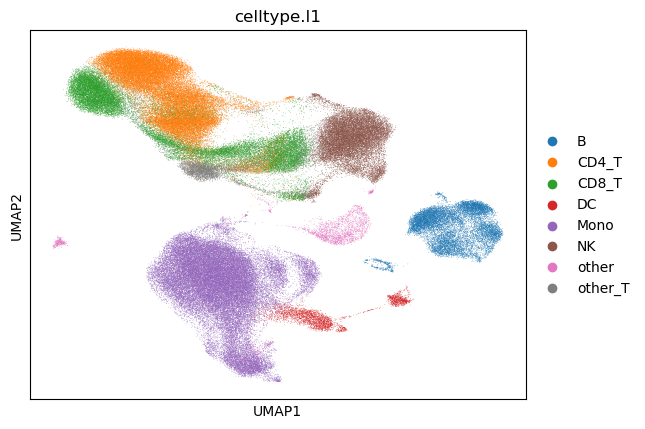

In [21]:
# UMAP of Hao
sc.pl.umap(adata, color='celltype.l1', legend_loc='right margin')

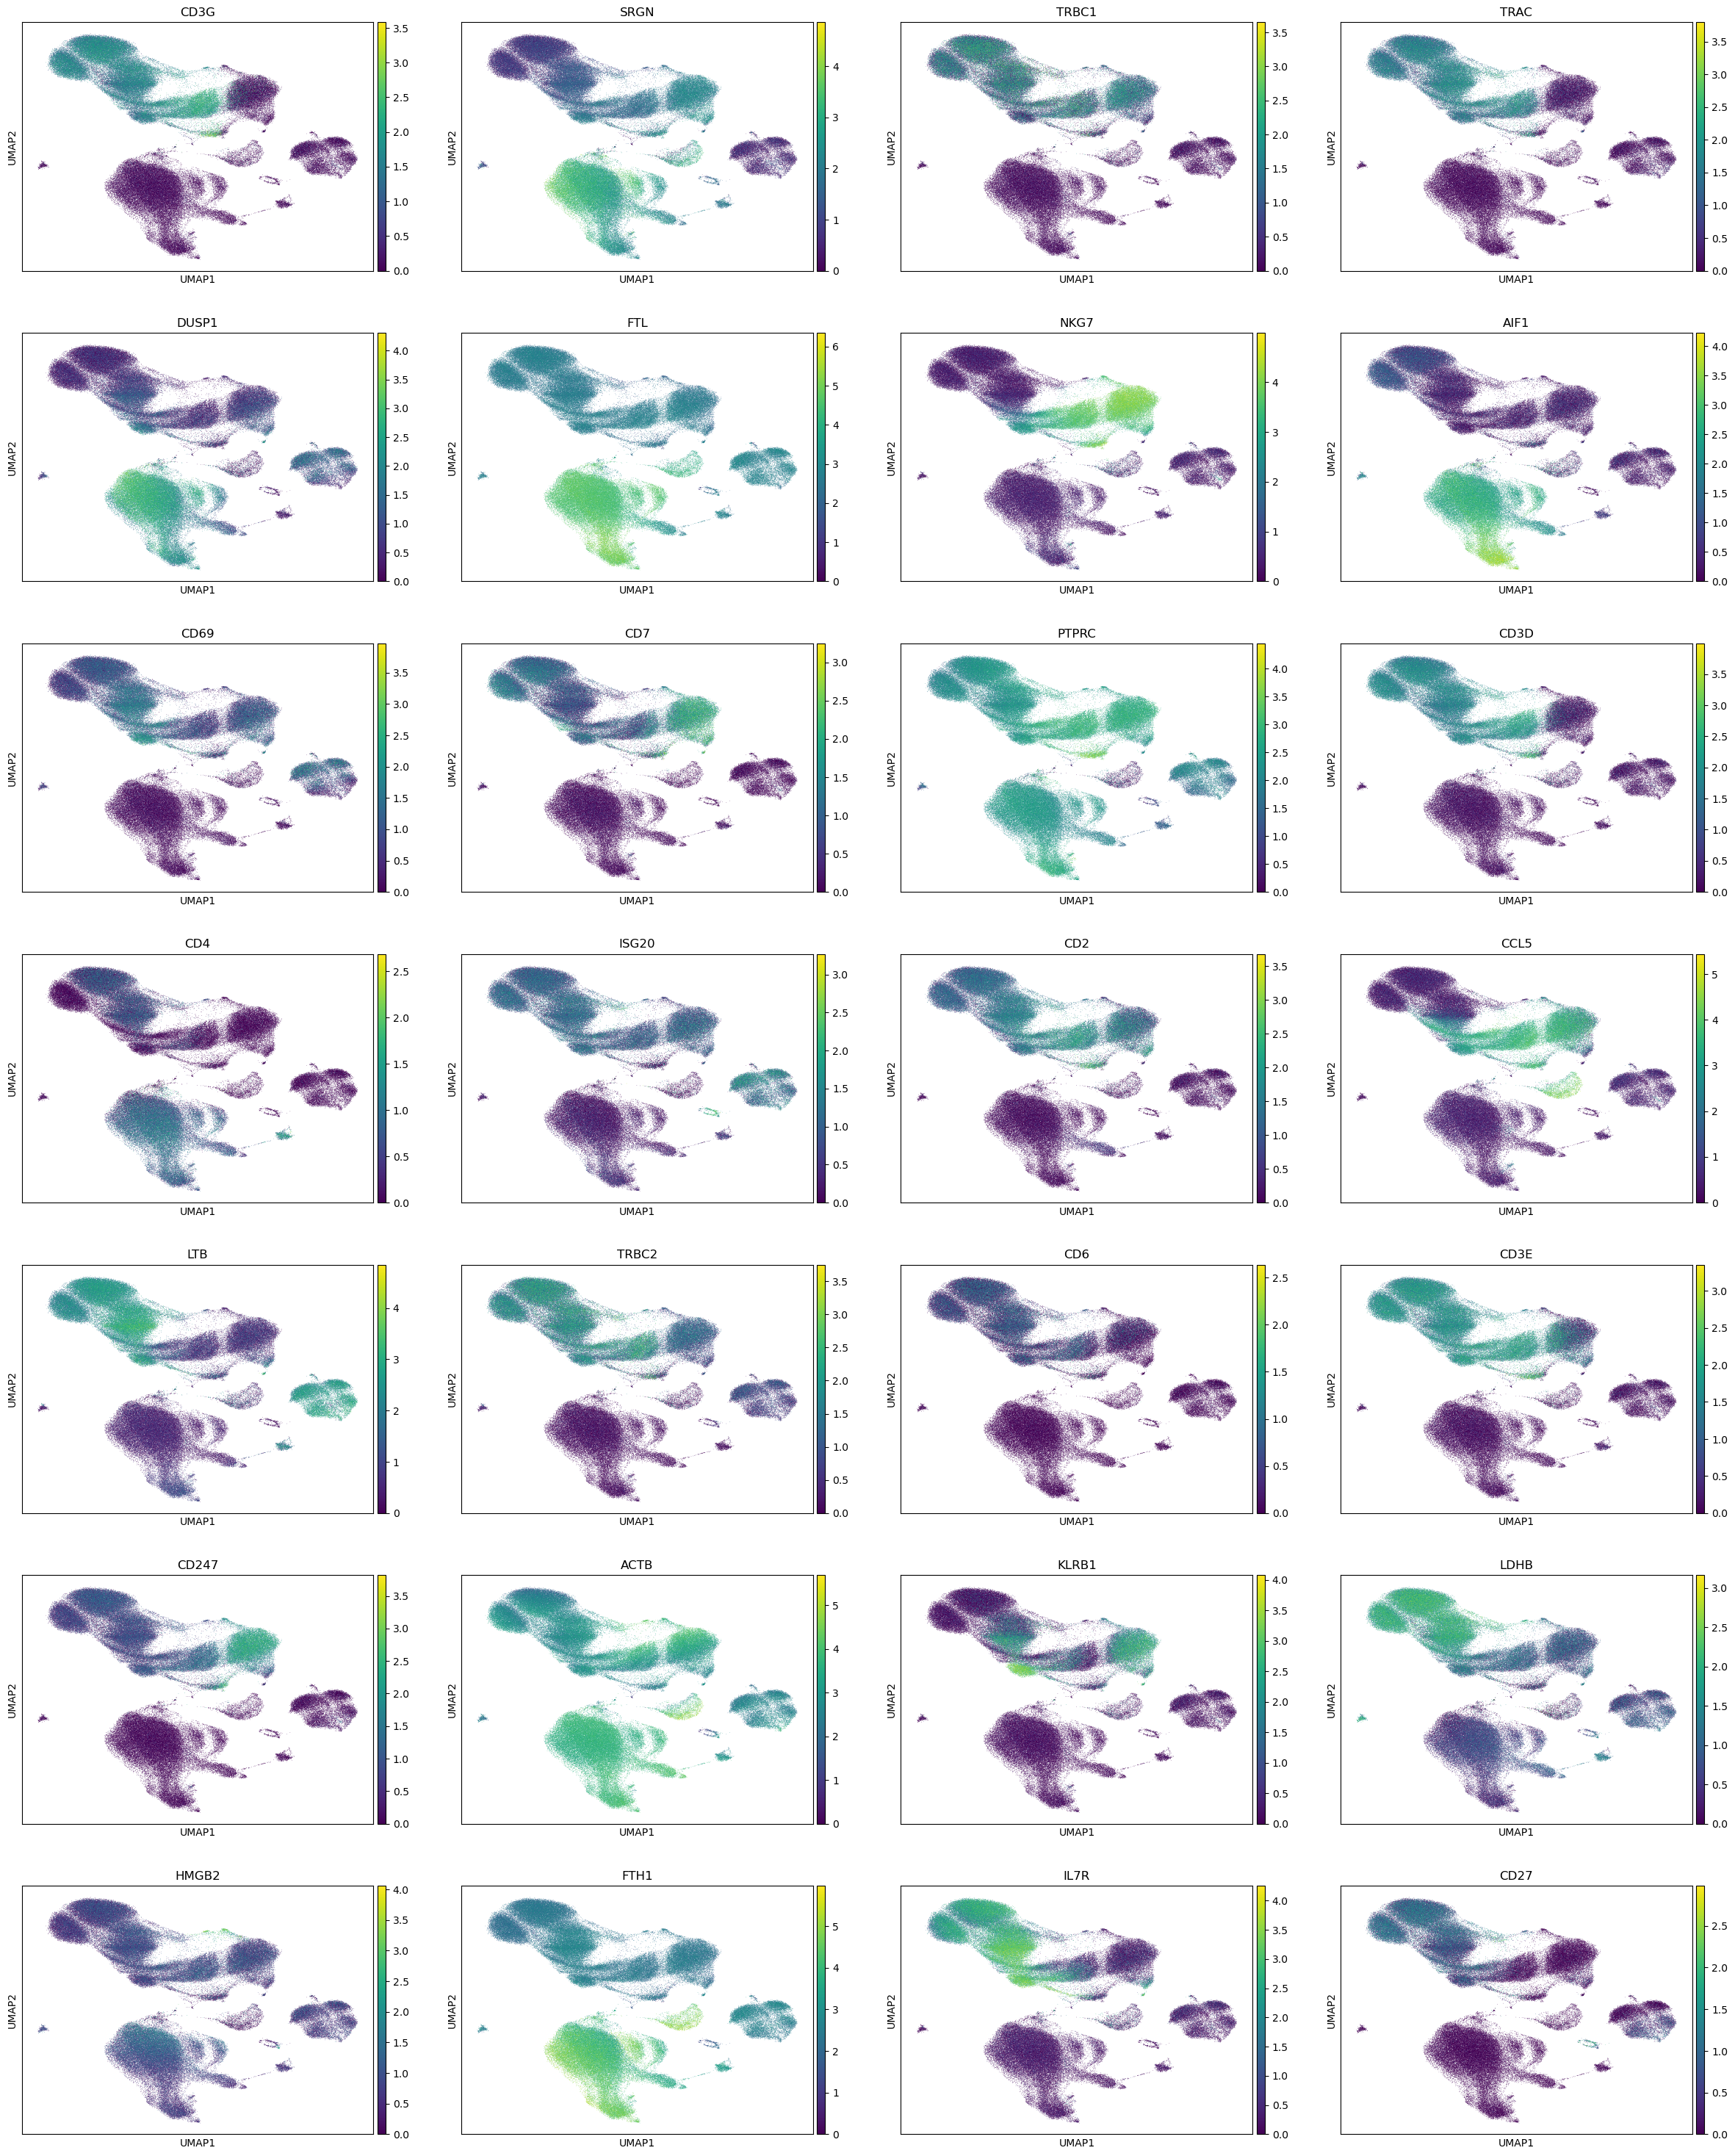

In [22]:
# UMAP of genes: inter_Hao_T
sc.pl.umap(adata, color=inter_Hao_T, legend_loc='right margin')

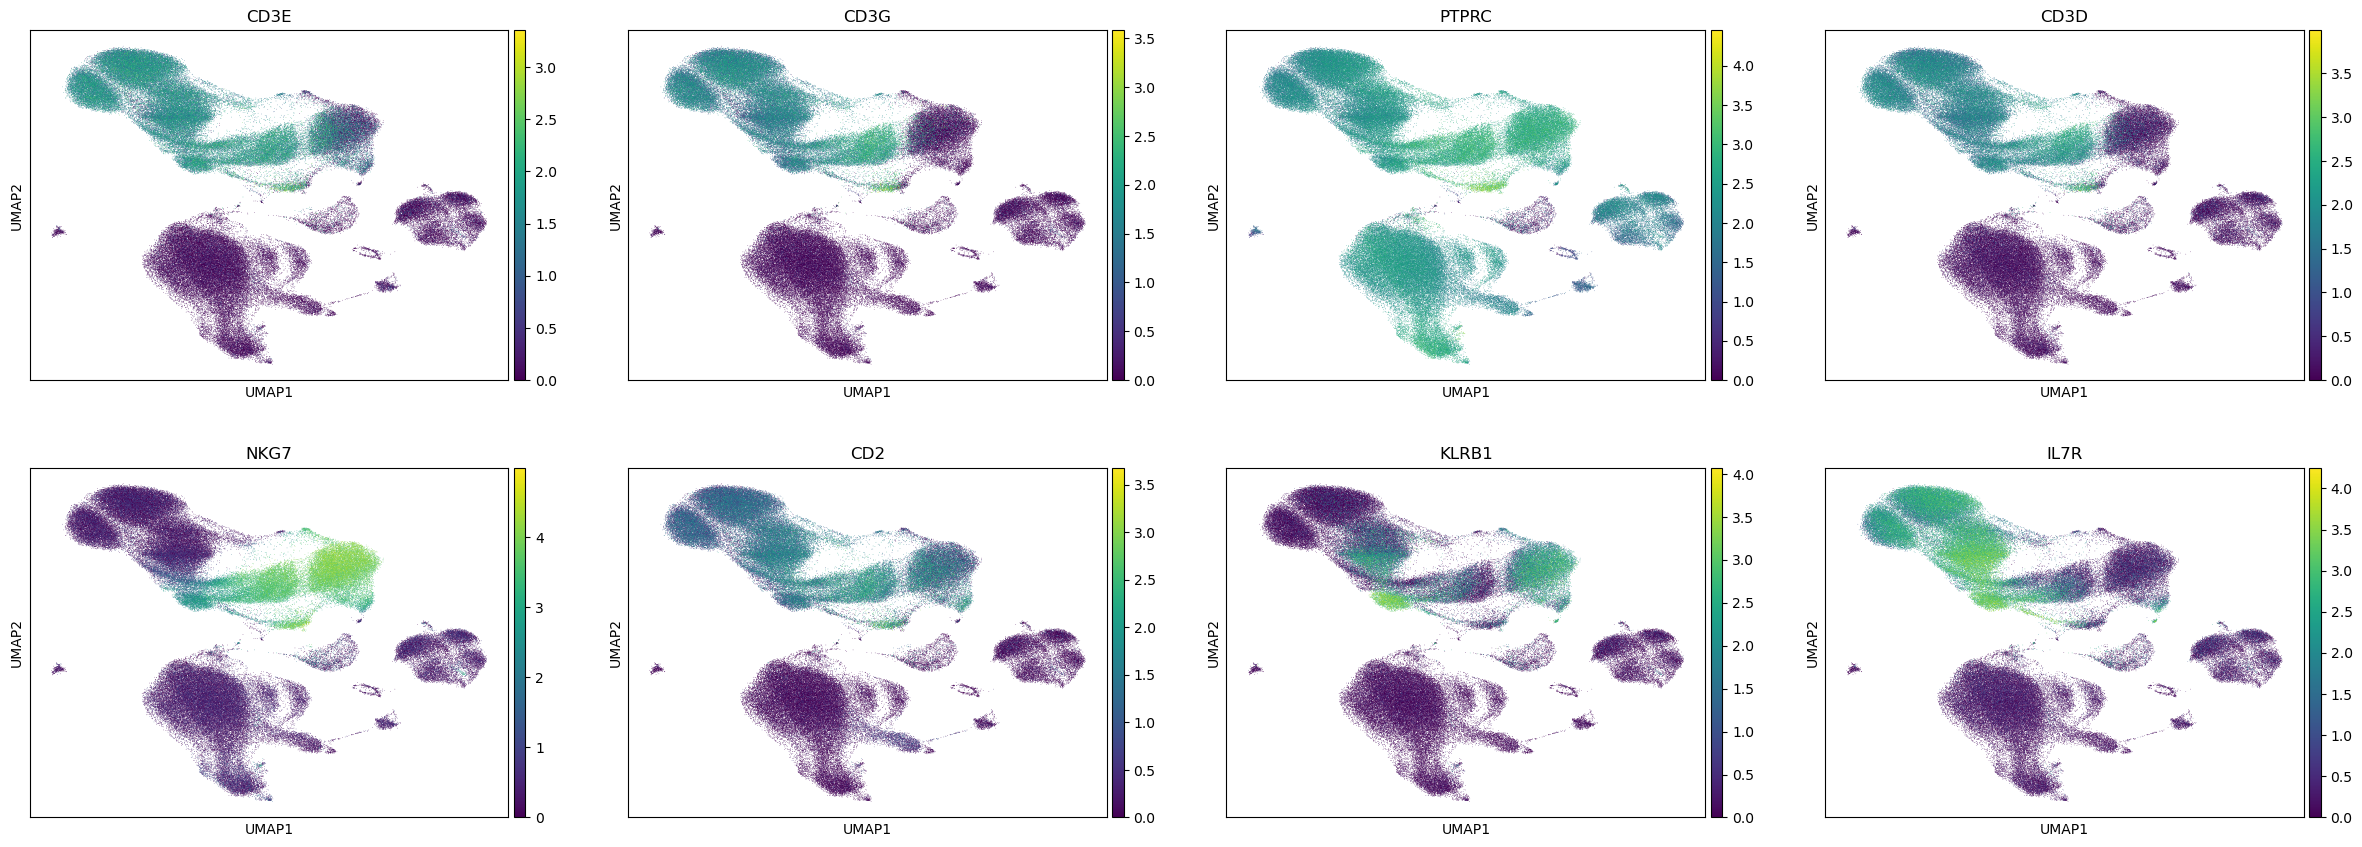

In [28]:
# UMAP of genes: inter_Hao_NK_T
sc.pl.umap(adata, color=inter_Hao_NK_T, legend_loc='right margin')
